In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('./Superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.shape

(9994, 21)

In [12]:
data.index

RangeIndex(start=0, stop=9994, step=1)

In [14]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [18]:
data.size

209874

In [19]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [20]:
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [53]:
#Question 1. Sales Performance by Category and Sub-Category:
# #Insight: To Identify which categories and sub-categories are performing best in terms of profit and quantity sold.

sales_performance = data.groupby(['Category', 'Sub-Category'])[['Profit', 'Quantity']].sum().reset_index()
sales_performance

,Category,Sub-Category,Profit,Quantity
0,Furniture,Bookcases,-3472.5560,868
1,Furniture,Chairs,26590.1663,2356
2,Furniture,Furnishings,13059.1436,3563
3,Furniture,Tables,-17725.4811,1241
4,Office Supplies,Appliances,18138.0054,1729
5,Office Supplies,Art,6527.7870,3000
6,Office Supplies,Binders,30221.7633,5974
7,Office Supplies,Envelopes,6964.1767,906
8,Office Supplies,Fasteners,949.5182,914
9,Office Supplies,Labels,5546.2540,1400


<Axes: xlabel='Order Month'>

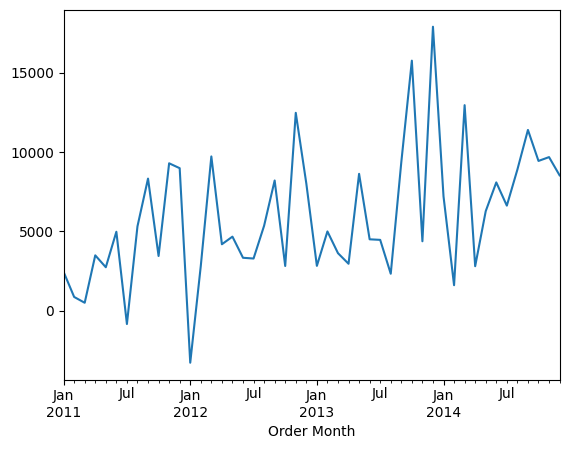

In [52]:
#Question 2. Seasonal Trends and Sales Patterns:
#Insight: Determine the sales performance over different months to identify peak and low seasons.

data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')

data['Order Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Month')['Profit'].sum()
monthly_sales.plot(kind='line')



In [51]:
#Question 3. Shipping Mode Analysis:
#Insight: Understand which shipping modes are most profitable and most frequently used.

shipping_performance = data.groupby('Ship Mode')[['Profit', 'Quantity']].sum().reset_index()
shipping_performance

,Ship Mode,Profit,Quantity
0,First Class,48969.8399,5693
1,Same Day,15891.7589,1960
2,Second Class,57446.6354,7423
3,Standard Class,164088.7875,22797


In [55]:
#Question 4. City-wise Sales Performance
#Insight: Identify which cities generate the most profit and have the highest sales volume.

city_performance = data.groupby('City')[['Profit', 'Quantity']].sum().reset_index()
city_performance

,City,Profit,Quantity
0,Aberdeen,6.6300,3
1,Abilene,-3.7584,2
2,Akron,-186.6356,65
3,Albuquerque,634.0881,65
4,Alexandria,318.6183,84
...,...,...,...
526,Woonsocket,78.6791,15
527,Yonkers,2767.7557,57
528,York,-102.1692,19
529,Yucaipa,13.2080,5


In [60]:
#Question 5. Customer Analysis:
#Insight: Identify top customers by profit and quantity purchased.

top_customers = data.groupby('Customer ID')[['Profit', 'Quantity']].sum().reset_index().sort_values(by='Profit', ascending=False)
top_customers.head(10)

,Customer ID,Profit,Quantity
741,TC-20980,8981.3239,42
621,RB-19360,6976.0959,71
669,SC-20095,5757.4119,87
327,HL-15040,5622.4292,50
6,AB-10105,5444.8055,73
730,TA-21385,4703.7883,36
160,CM-12385,3899.8904,34
424,KD-16495,3038.6254,84
48,AR-10540,2884.6208,33
234,DR-12940,2869.0760,57


In [64]:
#Question 6. Order Processing Time
#Insight: Measure the efficiency of the order processing system by analyzing the time between order and shipment

data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days
average_processing_time = round(data['Processing Time'].mean())
print(f"Average Processing Time: {average_processing_time} days")

Average Processing Time: 4 days


In [67]:
#Question 7.  Profitability Analysis
#Insight: Compare profit margins across different categories and cities to identify the most and least profitable segments.

profitability_by_category_city = data.groupby(['Category', 'City'])['Profit'].sum().reset_index()
profitability_by_category_city

,Category,City,Profit
0,Furniture,Akron,-72.0996
1,Furniture,Alexandria,104.4522
2,Furniture,Allen,-31.3722
3,Furniture,Allentown,3.3488
4,Furniture,Amarillo,-507.7095
...,...,...,...
1193,Technology,Wilmington,453.8370
1194,Technology,Woodland,23.9984
1195,Technology,Woodstock,98.1396
1196,Technology,Yonkers,2809.1598


In [68]:
#Question 8. Product Demand Analysis
#Insight: Identify the most and least demanded products based on quantity sold.

product_demand = data.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
product_demand

,Sub-Category,Quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158
2,Art,3000
0,Accessories,2976
5,Chairs,2356
1,Appliances,1729
10,Labels,1400


In [70]:
#Question 9. . Customer Segmentation
#Insight: Segment customers based on their purchase behavior (profit generated).

data['Customer Segment'] = pd.cut(data['Profit'], bins=[-float('inf'), 0, 100, 500, float('inf')], labels=['Loss', 'Low', 'Medium', 'High'])
data['Customer Segment']

0          Low
1       Medium
2          Low
3         Loss
4          Low
         ...  
9989       Low
9990       Low
9991       Low
9992       Low
9993       Low
Name: Customer Segment, Length: 9994, dtype: category
Categories (4, object): ['Loss' < 'Low' < 'Medium' < 'High']

<Axes: xlabel='Quantity', ylabel='Profit'>

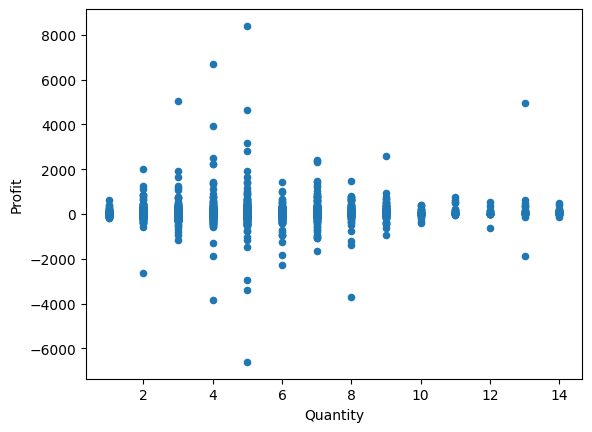

In [72]:
#Question 10.  Order Quantity and Profit Correlation
#Insight: Investigate the relationship between order quantity and profit to see if larger orders are more profitable.

data.plot(kind='scatter', x='Quantity', y='Profit')
